# 🧩 Preprocesamiento de datos - Entrega 2

Programa: Ingeniería de Sistemas  
Fecha: Noviembre 2025

# Preprocesado de Datos
Notebook correspondiente a la Entrega 2.
En este notebook se carga el archivo `train.csv` y se realiza el preprocesamiento de datos: imputación, codificación One-Hot y normalización.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
import warnings
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

warnings.filterwarnings('ignore')





## 💾 Carga de datos

In [2]:
import pandas as pd

df = pd.read_csv("/content/train.csv", encoding='utf-8', nrows=20000)
print(f"Usando solo {df.shape[0]} filas para prueba de preprocesamiento.")



Usando solo 20000 filas para prueba de preprocesamiento.


## 🧹 Limpieza básica

In [3]:


# 1. Elimina columnas duplicadas si existen
if 'F_TIENEINTERNET.1' in df.columns:
    df = df.drop(columns=['F_TIENEINTERNET.1'])
    print("🗑️ Columna 'F_TIENEINTERNET.1' eliminada.")

# 2. Convierte tipo de dato a texto (si aplica)
if 'PERIODO_ACADEMICO' in df.columns:
    df['PERIODO_ACADEMICO'] = df['PERIODO_ACADEMICO'].astype(str)

# 3. Función para quitar tildes y pasar a mayúsculas
def quitar_tildes(texto):
    if isinstance(texto, str):
        texto = unicodedata.normalize('NFD', texto)
        texto = ''.join(c for c in texto if unicodedata.category(c) != 'Mn')
        return texto.upper()
    return texto

# Aplicar limpieza a todas las columnas de texto
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].apply(quitar_tildes)

print("✅ Limpieza básica completada.")

# Mostrar las columnas después de limpieza
df.info()


🗑️ Columna 'F_TIENEINTERNET.1' eliminada.
✅ Limpieza básica completada.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           20000 non-null  int64  
 1   PERIODO_ACADEMICO            20000 non-null  object 
 2   E_PRGM_ACADEMICO             20000 non-null  object 
 3   E_PRGM_DEPARTAMENTO          20000 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  19804 non-null  object 
 5   E_HORASSEMANATRABAJA         19105 non-null  object 
 6   F_ESTRATOVIVIENDA            19055 non-null  object 
 7   F_TIENEINTERNET              19234 non-null  object 
 8   F_EDUCACIONPADRE             19331 non-null  object 
 9   F_TIENELAVADORA              18860 non-null  object 
 10  F_TIENEAUTOMOVIL             18743 non-null  object 
 11  E_PRIVADO_LIBERTAD           20000 non-null  object 
 12  E_

🔍 Porcentaje de valores nulos por columna:
F_TIENEAUTOMOVIL               0.06285
F_TIENELAVADORA                0.05700
F_TIENECOMPUTADOR              0.05475
F_ESTRATOVIVIENDA              0.04725
E_HORASSEMANATRABAJA           0.04475
F_TIENEINTERNET                0.03830
F_EDUCACIONMADRE               0.03415
F_EDUCACIONPADRE               0.03345
E_PAGOMATRICULAPROPIO          0.01000
E_VALORMATRICULAUNIVERSIDAD    0.00980
dtype: float64


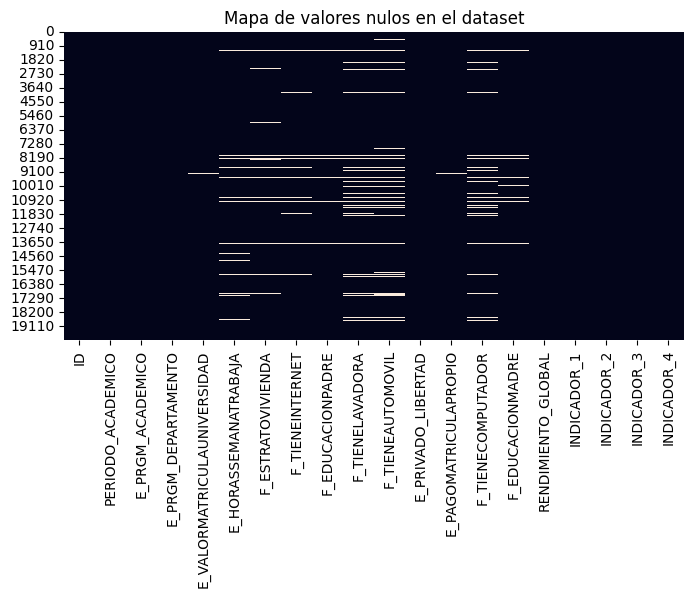

In [4]:
# Muestra el porcentaje de nulos por columna
missing = df.isnull().mean().sort_values(ascending=False)
print("🔍 Porcentaje de valores nulos por columna:")
print(missing[missing > 0].head(10))

# Visualización simple
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de valores nulos en el dataset")
plt.show()


## 🧩 Imputación de valores faltantes

In [26]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

imputer_num = SimpleImputer(strategy='mean')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

print(" Imputación de valores faltantes completada.")

# Verificar que ya no haya nulos
print("Nulos restantes:", df.isnull().sum().sum())


 Imputación de valores faltantes completada.
Nulos restantes: 0


In [17]:
cat_cols = ['PERIODO_ACADEMICO', 'E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO']



## 🎭 Codificación One-Hot

In [24]:


encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_df = pd.DataFrame(encoder.fit_transform(df[cat_cols]))
encoded_df.columns = encoder.get_feature_names_out(cat_cols)

num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_encoded = pd.concat([df[num_cols].reset_index(drop=True),
                        encoded_df.reset_index(drop=True)], axis=1)

print(f"🏗️ Dimensión después del One-Hot Encoding: {df_encoded.shape}")
df_encoded.head()



🏗️ Dimensión después del One-Hot Encoding: (20000, 671)


,ID,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,PERIODO_ACADEMICO_20183,PERIODO_ACADEMICO_20184,PERIODO_ACADEMICO_20194,PERIODO_ACADEMICO_20195,PERIODO_ACADEMICO_20196,...,E_PRGM_DEPARTAMENTO_META,E_PRGM_DEPARTAMENTO_NARINO,E_PRGM_DEPARTAMENTO_NORTE SANTANDER,E_PRGM_DEPARTAMENTO_PUTUMAYO,E_PRGM_DEPARTAMENTO_QUINDIO,E_PRGM_DEPARTAMENTO_RISARALDA,E_PRGM_DEPARTAMENTO_SANTANDER,E_PRGM_DEPARTAMENTO_SUCRE,E_PRGM_DEPARTAMENTO_TOLIMA,E_PRGM_DEPARTAMENTO_VALLE
0,904256,0.322,0.208,0.310,0.267,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,645256,0.311,0.215,0.292,0.264,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,308367,0.297,0.214,0.305,0.264,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,470353,0.485,0.172,0.252,0.190,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,989032,0.316,0.232,0.285,0.294,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 📏 Normalización de variables numéricas

In [23]:
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# resumen estadístico después de normalizar
df_encoded[num_cols].describe().T.head()


,count,mean,std,min,25%,50%,75%,max
ID,20000.0,-8.881784e-18,1.000025,-1.731162,-0.865841,0.001897,0.860869,1.734280
INDICADOR_1,20000.0,1.474376e-17,1.000025,-2.203750,-0.532806,-0.229743,0.368193,3.177672
INDICADOR_2,20000.0,-2.760459e-16,1.000025,-2.781799,-0.504776,-0.075149,0.526328,2.448909
INDICADOR_3,20000.0,-6.995293e-16,1.000025,-4.406608,-0.116534,0.236766,0.539594,0.977014
INDICADOR_4,20000.0,1.504574e-16,1.000025,-3.839686,-0.108953,0.315326,0.578672,1.017582


## 💾 Guardar dataset limpio y preprocesado

In [21]:
output_path = 'train_preprocesado.csv'
df_encoded.to_csv(output_path, index=False, encoding='utf-8')

print(f'💾 Dataset preprocesado guardado en: {output_path}')
print(f'Dimensión final: {df_encoded.shape}')


💾 Dataset preprocesado guardado en: train_preprocesado.csv
Dimensión final: (20000, 671)
